In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
#1)
mu,var=0,1
'''gamma=norm.ppf(0.001)*var+mu #par slide 11
print(gamma)
N=(norm.ppf(0.001)/(gamma*np.sqrt(var)))**2
print(N)
print(norm.cdf(gamma/(np.sqrt(var/N))))

print(norm.cdf(gamma))
print(norm.cdf(0.5/(np.sqrt(1/39))))

print(norm.cdf(0.5))
print(norm.cdf(np.sqrt(39)/2-1))'''
gamma=0.5

In [3]:
print((norm.ppf(0.001)/(gamma*np.sqrt(var)))**2)
N=39

38.19814282433296


In [4]:
#2)
k=10000
#b=np.random.binomial(n=1, p=0.5, size=[k]) #random bin sequence
#print(b)

In [5]:
def vec_bin_array(arr, m): #source:https://stackoverflow.com/questions/22227595/convert-integer-to-binary-array-with-suitable-padding
    to_str_func = np.vectorize(lambda x: np.binary_repr(x).zfill(m))
    strs = to_str_func(arr)
    ret = np.zeros(list(arr.shape) + [m], dtype=np.int8)
    for bit_ix in range(0, m):
        fetch_bit_func = np.vectorize(lambda x: x[bit_ix] == '1')
        ret[...,bit_ix] = fetch_bit_func(strs).astype("int8")
    return ret 
'''b=np.random.randint(2, size=k)
w_c=vec_bin_array(b,1)
#print(w)
#print(w_c)
x=np.tile(w_c,(1,N))
#print(np.tile(w_c,(1,k)))
z=np.random.normal(mu, var, np.shape(x))
y=x+z
#print(y)
x_chap=np.where(y<gamma,0,1)
#print(x_chap)
b_chap1=np.sum(y,axis=1)/N
b_chap2=np.where(b_chap1<gamma,0,1)
#print(b_chap2)
nb_err=len(np.where(b!=b_chap2)[0])
print(nb_err)
print(nb_err/k)

P_m=np.where(b-b_chap2==1)
print(len(P_m[0]))
P_fa=np.where(b-b_chap2==-1)
print(len(P_fa[0]))'''
print()

In [6]:
#2a)
def fct_e3():
    b=np.random.randint(2, size=k)
    w_c=vec_bin_array(b,1)
    x=np.tile(w_c,(1,N))
    z=np.random.normal(mu, var, np.shape(x))
    y=x+z
    x_chap=np.where(y<gamma,0,1)
    b_chap1=np.sum(y,axis=1)/N
    b_chap2=np.where(b_chap1<gamma,0,1)
    nb_err=len(np.where(b!=b_chap2)[0])
    P_m=np.where(b-b_chap2==1)
    P_fa=np.where(b-b_chap2==-1)
    return [len(P_m[0]),len(P_fa[0]),nb_err]

In [7]:
#2c)
a=np.array([fct_e3() for _ in range(500)])
p_mean=np.mean(a,axis=0)
print(p_mean)
print(p_mean/k)
p_fa=a[:,1]
p_m=a[:,0]
p_e=a[:,2]

[4.45  4.564 9.014]
[0.000445  0.0004564 0.0009014]


In [8]:
print(len(np.where((p_m/k)>0.001)[0]))
print(len(np.where((p_fa/k)>0.001)[0]))

3
4


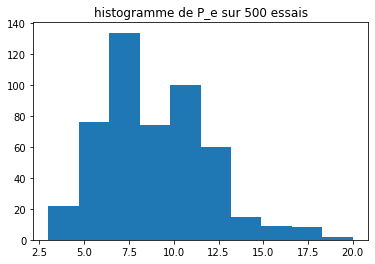

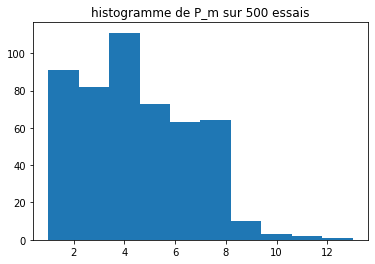

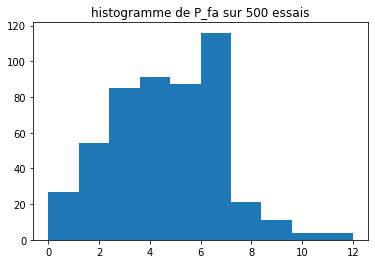

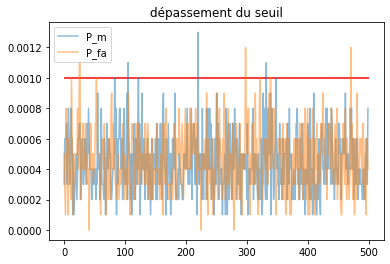

In [9]:
#2c)
plt.hist(p_e)
plt.hist
plt.title('histogramme de P_e sur 500 essais')
plt.show()

plt.hist(p_m)
plt.title('histogramme de P_m sur 500 essais')
plt.show()

plt.hist(p_fa)
plt.title('histogramme de P_fa sur 500 essais')
plt.show()

plt.plot(p_m/k,alpha=0.5,label='P_m')
plt.plot(p_fa/k,alpha=0.5,label='P_fa')
plt.hlines(0.001,0,500,colors='r')
plt.title('dépassement du seuil')
plt.legend()
plt.show()

In [10]:
#2b)

b=np.random.randint(2, size=k)
w_c=vec_bin_array(b,1)
x=np.tile(w_c,(1,N))
z=np.random.normal(mu, var, np.shape(x))
y=x+z
x_chap=np.where(y<gamma,0,1)
b_chap1=np.sum(y,axis=1)/N
b_chap2=np.where(b_chap1<gamma,0,1)
nb_err=len(np.where(b!=b_chap2)[0])
P_m=np.where(b-b_chap2==1)
P_fa=np.where(b-b_chap2==-1)



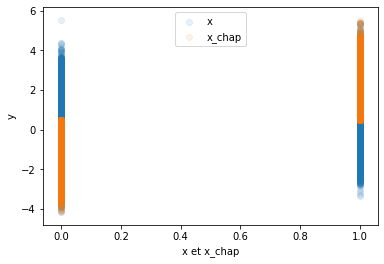

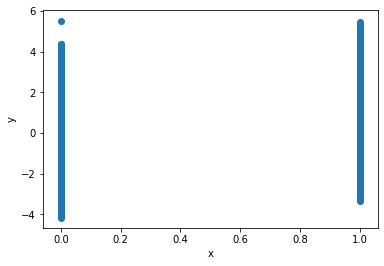

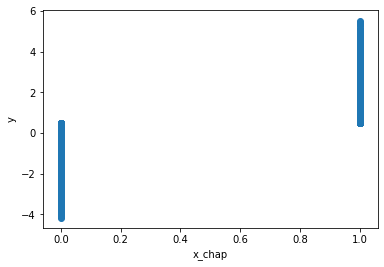

In [11]:
plt.scatter(x,y,alpha=0.1,label='x')
plt.scatter(x_chap,y,alpha=0.1,label='x_chap')
plt.xlabel('x et x_chap')
plt.ylabel('y')
plt.legend(loc=9)
plt.show()


plt.scatter(x,y,label='x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.scatter(x_chap,y,label='x_chap')
plt.xlabel('x_chap')
plt.ylabel('y')
plt.show()

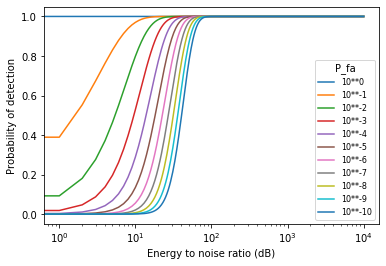

In [47]:
from scipy.special import erf
from scipy.special import erfinv

def phi(x):
    return 0.5*(1+erf(x/np.sqrt(2)))
def Q(x):
    return 1-phi(x)
def Q_inv(x):
    return erfinv(2*(1-x)-1)*np.sqrt(2)
def P_d(P_fa,ratio):
    return Q(Q_inv(P_fa)-np.sqrt(ratio))

I=np.linspace(0,10000,10000)

plt.plot(I,P_d(10**0,I),label='10**0')
plt.plot(I,P_d(10**-1,I),label='10**-1')
plt.plot(I,P_d(10**-2,I),label='10**-2')
plt.plot(I,P_d(10**-3,I),label='10**-3')
plt.plot(I,P_d(10**-4,I),label='10**-4')
plt.plot(I,P_d(10**-5,I),label='10**-5')
plt.plot(I,P_d(10**-6,I),label='10**-6')
plt.plot(I,P_d(10**-7,I),label='10**-7')
plt.plot(I,P_d(10**-8,I),label='10**-8')
plt.plot(I,P_d(10**-9,I),label='10**-9')
plt.plot(I,P_d(10**-10,I),label='10**-10')
plt.xscale('log')
plt.ylabel('Probability of detection')
plt.xlabel('Energy to noise ratio (dB)')

plt.legend(prop={'size': 8},title='P_fa')
plt.show()

In [ ]:
'''Q, Q^(-1)
X = np.random.normal(mu0, sigma0, 1000)
a=norm.cdf(0)
b=norm.cdf(2)
print('q(0)=a=',a)
print('q(2)=b=',b)

print('inverse q (a)=',norm.ppf(a))
print('inverse q (b)=',norm.ppf(b))'''

In [ ]:
norm.ppf(0.00001)